# Part 3 annotation validation 

In this notebook the final annotation of the T and Dendritic (DC) cell populations in the allntova dataset (see part 2b) is validated by comparing each final annotated cell state to each prior-annotated reference state in the datasets that were prepared in part 1b using a reciprocal similarity score (Gerhard et al., 2020: https://doi.org/10.1084/jem.20200264; Fig. S1B & S1C). In addition, we examine whether cell state enriched gene sets represent/match cell state annotation (Fig. S1E). Lastly, to make it possible for other researchers to review the single-cell transcriptome data, an interactive SPRING explorer is exported that will be loaded onto the SPRING server: https://github.com/AllonKleinLab/SPRING_dev 

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import functools 
import seaborn as sns 
import mm_functions_14_10_2020 as mm

In [3]:
# Set figure parameters 
mylines = 0.15*2.82 # the number 2.82 is the difference
					# between Illustrator 1 pt and python 1 pt.
mpl.rcParams['axes.linewidth'] = mylines # default 1
mpl.rcParams['ytick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.major.size'] = 2 # default 4
mpl.rcParams['ytick.major.size'] = 2 # default 4
mpl.rcParams['xtick.major.width'] = mylines # default 0.5
mpl.rcParams['ytick.major.width'] = mylines # default 0.5
mpl.rcParams['grid.linewidth'] = mylines/1.5 # default 0.5
mpl.rcParams['grid.color'] = '0.8' # default 'k'
mpl.rcParams['grid.linestyle'] = 'solid'# default ':'
mpl.rcParams['legend.frameon'] = False # default True
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load adata's DCs

In [6]:
# Create a path dict 
keys = [path.split('_')[1] for path in glob.glob('./backups/adata_*.h5ad')]
values = glob.glob('backups/adata_*.h5ad')
adataPathDict = dict(zip(keys, values))

In [7]:
adataPathDict

{'miller': 'backups/adata_miller_05202020.h5ad',
 'zhangcd40': 'backups/adata_zhangcd40_05202020.h5ad',
 'millerlcmv': 'backups/adata_millerlcmv_05202020.h5ad',
 'allntova': 'backups/adata_allntova_05302020.h5ad'}

In [8]:
# Reload adatas into dict  
adata = {key:sc.read_h5ad(value) for key, value in adataPathDict.items()}

In [6]:
# Check shapes 
for dataset in adata.keys():
    print(dataset)
    print(adata[dataset].shape)

zilionis
(15939, 28205)
maier
(1468, 27933)
zhangcd40
(119698, 15243)
allntova
(8757, 20679)


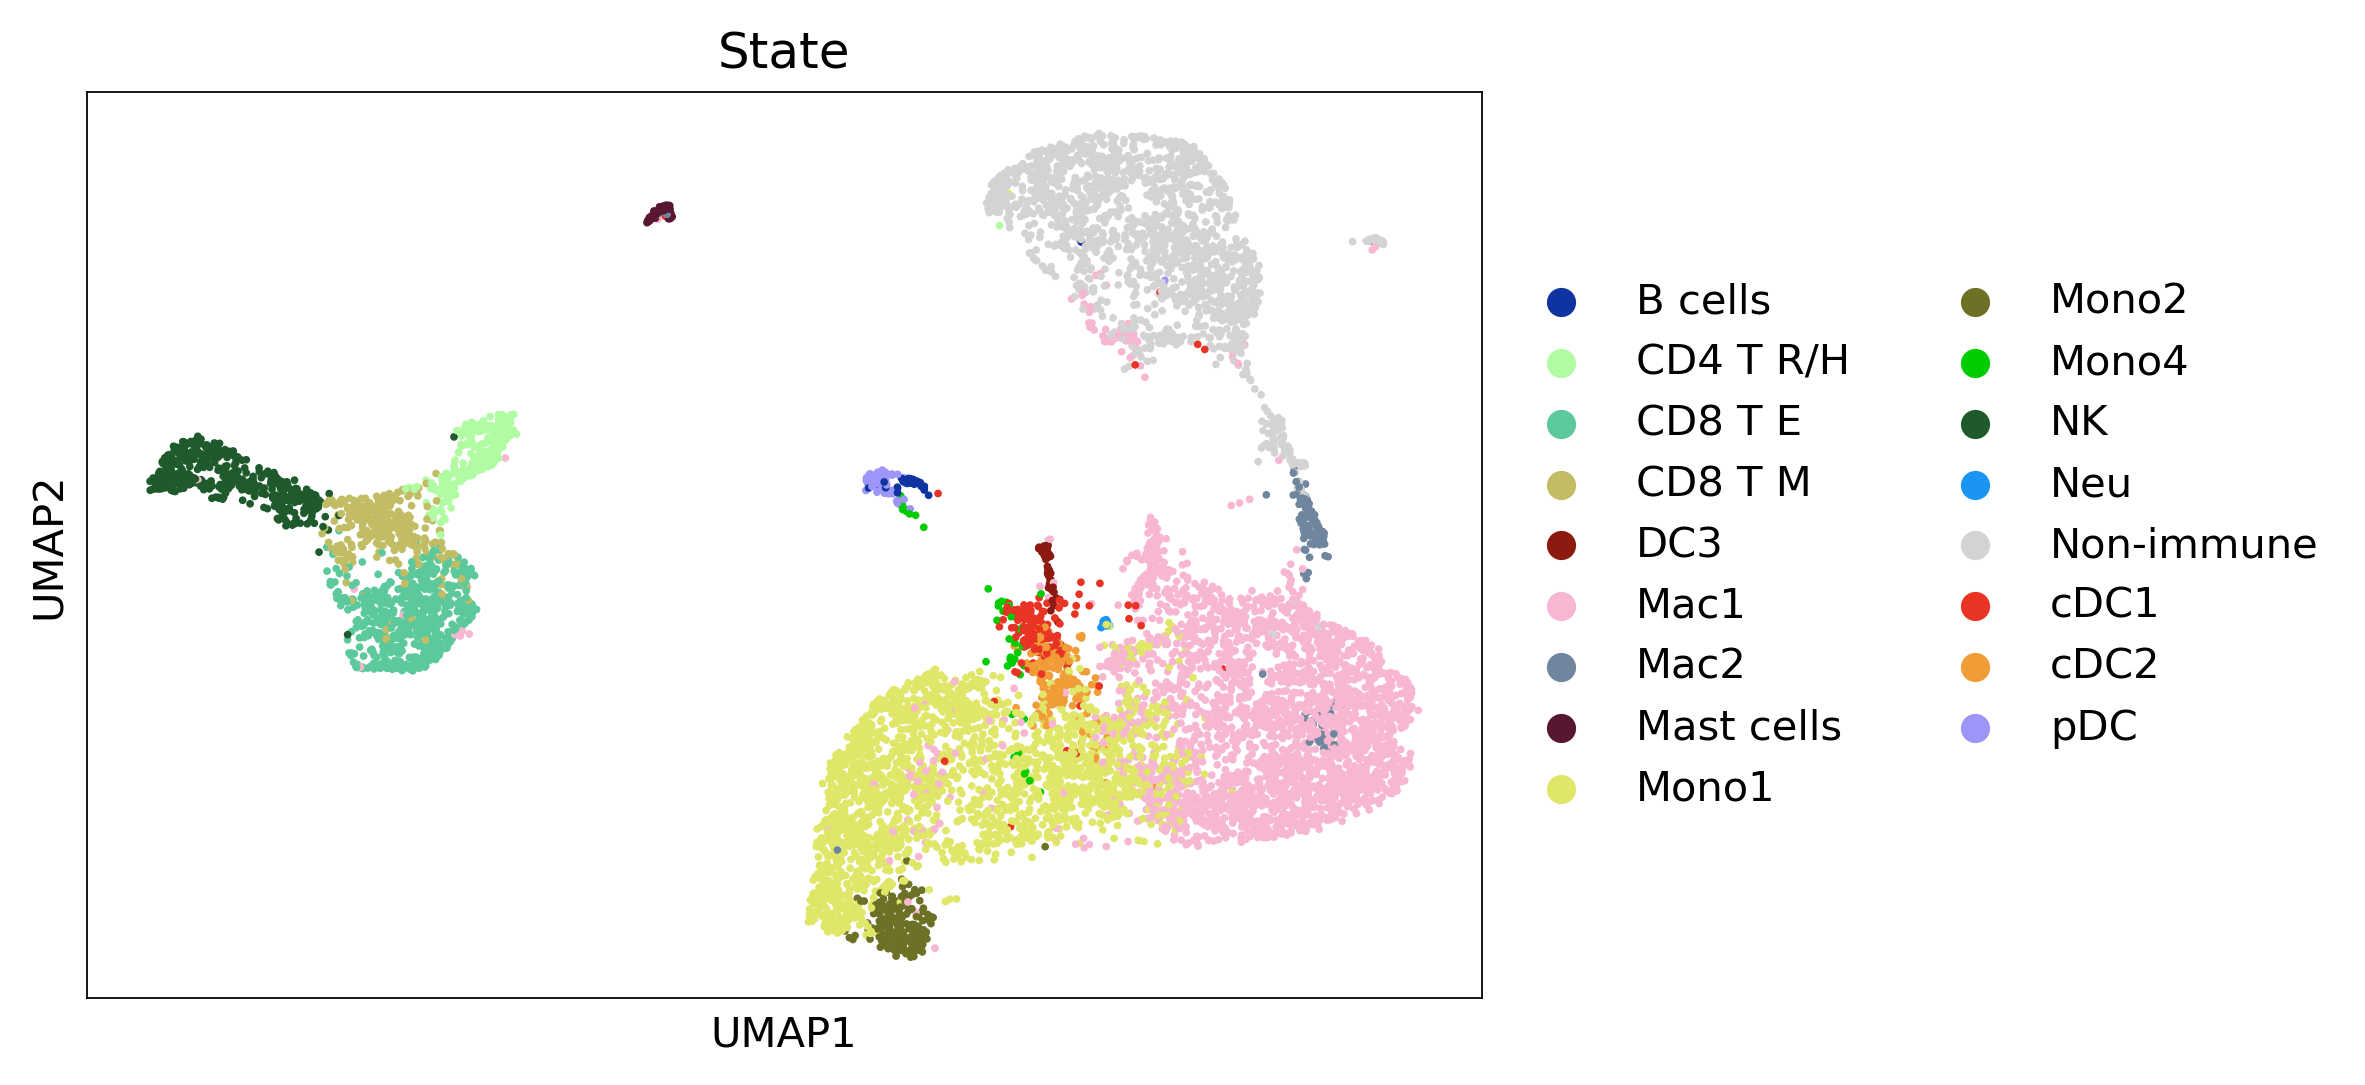

In [7]:
# Check the allntova umap 
sc.pl.umap(adata['allntova'], color = 'State')

## Add name prefix to states in each adata

In [8]:
# Zilionis
adata['zilionis'].obs['state'] = ['zi-'+ str(cluster) for cluster in adata['zilionis'].obs['state']]

# Maier
adata['maier'].obs['state'] = ['ma-'+ str(cluster) for cluster in adata['maier'].obs['state']]

# Allntova 
adata['allntova'].obs['State'] = ['ov-'+ str(cluster) for cluster in adata['allntova'].obs['State']]

# Zhangcd40
adata['zhangcd40'].obs['State'] = ['zh-'+ str(cluster) for cluster in adata['zhangcd40'].obs['State']]

## Filter to select DC states

In [9]:
# Subset Zilionis

# Tumor DCs: 
zi_slist_1 = ['zi-DC1', 'zi-DC2', 'zi-DC3', 'zi-MonoDC', 'zi-pDC', 'zi-Mac1', 'zi-Mac2', 
              'zi-Mono1','zi-Mac3', 'zi-Mono2', 'zi-Mac4','zi-Mono3']

zi_slist_2 = ['zi-DC1', 'zi-DC2', 'zi-DC3', 'zi-MonoDC', 'zi-pDC']

# Actually do the filtering 
adata['zilionis'] = mm.filter_cells_adata(adata['zilionis'], return_filtered = True, 
                                          col1 = 'state', flist1 = zi_slist_2, 
                                          col2 = 'Tumor or healthy', flist2 = ['t']) 

699 cells will survive state filtering.
9201 cells will survive Tumor or healthy filtering.
646 cells will survive all filters.

Shape before filtering: (15939, 28205)
Shape after filtering: (646, 28205) 

state unique values after filtering: ['zi-DC1', 'zi-DC3', 'zi-DC2', 'zi-pDC', 'zi-MonoDC'] 

Tumor or healthy unique values after filtering: ['t'] 



/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [10]:
# Subset allntova 

# Tumor DCs: 
ov_slist_1 = ['ov-cDC1', 'ov-cDC2', 'ov-DC3', 'ov-pDC', 'ov-Mono1', 'ov-Mac', 'ov-Mac/TU', 'ov-Mono2', 'ov-Mono1/Mac', 'ov-MonoDC']
ov_slist_2 =  ['ov-cDC1', 'ov-cDC2', 'ov-DC3', 'ov-pDC', 'ov-Mono4']

# Actually do the filtering 
adata['allntova'] = mm.filter_cells_adata(adata['allntova'], return_filtered = True, 
                                          col1 = 'State', flist1 = ov_slist_2) 

537 cells will survive State filtering.

Shape before filtering: (8757, 20679)


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Shape after filtering: (537, 20679) 

State unique values after filtering: ['ov-cDC2', 'ov-cDC1', 'ov-DC3', 'ov-Mono4', 'ov-pDC'] 



In [11]:
# Subset zhangcd40 
zh_slist_1 = ['zh-mM03_pDC-Siglech', 'zh-mM06_cDC1-Clec9a', 'zh-mM05_cDC2-Itgax', 'zh-mM04_cDC2-Cd209a', 'zh-mM07_cDC1-Ccl22']
zh_tlist_1 = ['Tumor']
zh_trlist_1 = ['Isotype']


adata['zhangcd40'] = mm.filter_cells_adata(adata['zhangcd40'], return_filtered = True, 
                                           col1 = 'State', flist1 = zh_slist_1,
                                           col2 = 'Tissue', flist2 = zh_tlist_1, 
                                           col3 = 'Treatment', flist3 = zh_trlist_1) 

7074 cells will survive State filtering.
51252 cells will survive Tissue filtering.
66931 cells will survive Treatment filtering.
1927 cells will survive all filters.

Shape before filtering: (119698, 15243)
Shape after filtering: (1927, 15243) 

State unique values after filtering: ['zh-mM03_pDC-Siglech', 'zh-mM04_cDC2-Cd209a', 'zh-mM06_cDC1-Clec9a', 'zh-mM07_cDC1-Ccl22', 'zh-mM05_cDC2-Itgax'] 

Tissue unique values after filtering: ['Tumor'] 

Treatment unique values after filtering: ['Isotype'] 



/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


## For all datasets, create an outlier gene filter gmask 

In [12]:
# Filter out outlier genes 
gmask = {}
for dataset in adata.keys(): 
    print(dataset)
    min_counts = 1 * adata[dataset].X.sum(1).mean()/1e4
    gmask[dataset] = mm.gmask_outlier_genes(adata[dataset], min_counts = min_counts, min_cells = 5)

zilionis
14938 genes are expressed in at least 5 cells with at least more than 0.2434620849609375 counts per cell

maier
11475 genes are expressed in at least 5 cells with at least more than 0.80491103515625 counts per cell

zhangcd40
11346 genes are expressed in at least 5 cells with at least more than 0.586404052734375 counts per cell

allntova
9634 genes are expressed in at least 5 cells with at least more than 0.10839515380859376 counts per cell



In [13]:
# Find common genes of all datasets 
var_names = functools.reduce(np.intersect1d, [adata[dataset][:, gmask[dataset]].var_names for dataset in adata.keys()])
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


7400

In [14]:
# Subset adata's to have intersecting var_names
for dataset in adata.keys():
    print(dataset)
    adata[dataset] = adata[dataset][:, var_names].copy()
    print(len(adata[dataset].var_names), adata[dataset].shape)

zilionis


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


7400 (646, 7400)
maier
7400 (1468, 7400)
zhangcd40
7400 (1927, 7400)
allntova
7400 (537, 7400)


## Log Linear SVC DC

In [15]:
# Rename 'State' columns to 'state'
adata['zhangcd40'].obs.rename({'State': 'state'}, axis=1, inplace = True)
adata['allntova'].obs.rename({'State': 'state'}, axis=1, inplace = True)

In [16]:
# Run linear SVM for all dataset-dataset comparisons (also self-self) on log transformed adata
log_mean_predp_linearSVM = mm.adata_classifier(mm.fit_linearSVM, adata, log = True, c_param = 1, max_iter = 20000)

Started running zilionis_to_zilionis
Started running zilionis_to_maier
Started running zilionis_to_zhangcd40
Started running zilionis_to_allntova
Started running maier_to_zilionis
Started running maier_to_maier
Started running maier_to_zhangcd40
Started running maier_to_allntova
Started running zhangcd40_to_zilionis
Started running zhangcd40_to_maier
Started running zhangcd40_to_zhangcd40
Started running zhangcd40_to_allntova
Started running allntova_to_zilionis
Started running allntova_to_maier
Started running allntova_to_zhangcd40
Started running allntova_to_allntova


In [18]:
# Calculate reciprocals for all dataset-dataset comparisons (also self-self)
reciprocals_log_linearSVM = mm.calculate_reciprocals(log_mean_predp_linearSVM) 

Multiplying zilionis_to_zilionis with zilionis_to_zilionis
Assigned zilionis_zilionis
Assigned zilionis_zilionis
Multiplying zilionis_to_maier with maier_to_zilionis
Assigned zilionis_maier
Assigned maier_zilionis
Multiplying zilionis_to_zhangcd40 with zhangcd40_to_zilionis
Assigned zilionis_zhangcd40
Assigned zhangcd40_zilionis
Multiplying zilionis_to_allntova with allntova_to_zilionis
Assigned zilionis_allntova
Assigned allntova_zilionis
Multiplying maier_to_zilionis with zilionis_to_maier
Assigned maier_zilionis
Assigned zilionis_maier
Multiplying maier_to_maier with maier_to_maier
Assigned maier_maier
Assigned maier_maier
Multiplying maier_to_zhangcd40 with zhangcd40_to_maier
Assigned maier_zhangcd40
Assigned zhangcd40_maier
Multiplying maier_to_allntova with allntova_to_maier
Assigned maier_allntova
Assigned allntova_maier
Multiplying zhangcd40_to_zilionis with zilionis_to_zhangcd40
Assigned zhangcd40_zilionis
Assigned zilionis_zhangcd40
Multiplying zhangcd40_to_maier with maier_t

In [19]:
heatmap_log_linearSVM = pd.concat([reciprocals_log_linearSVM[df].stack() for df in reciprocals_log_linearSVM.keys()], axis=0).unstack()

In [20]:
heatmap_log_linearSVM.min().min()

0.01639876396086655

In [21]:
heatmap_log_linearSVM.max().max()

0.7784793283531813

## Fig. S1C 

True


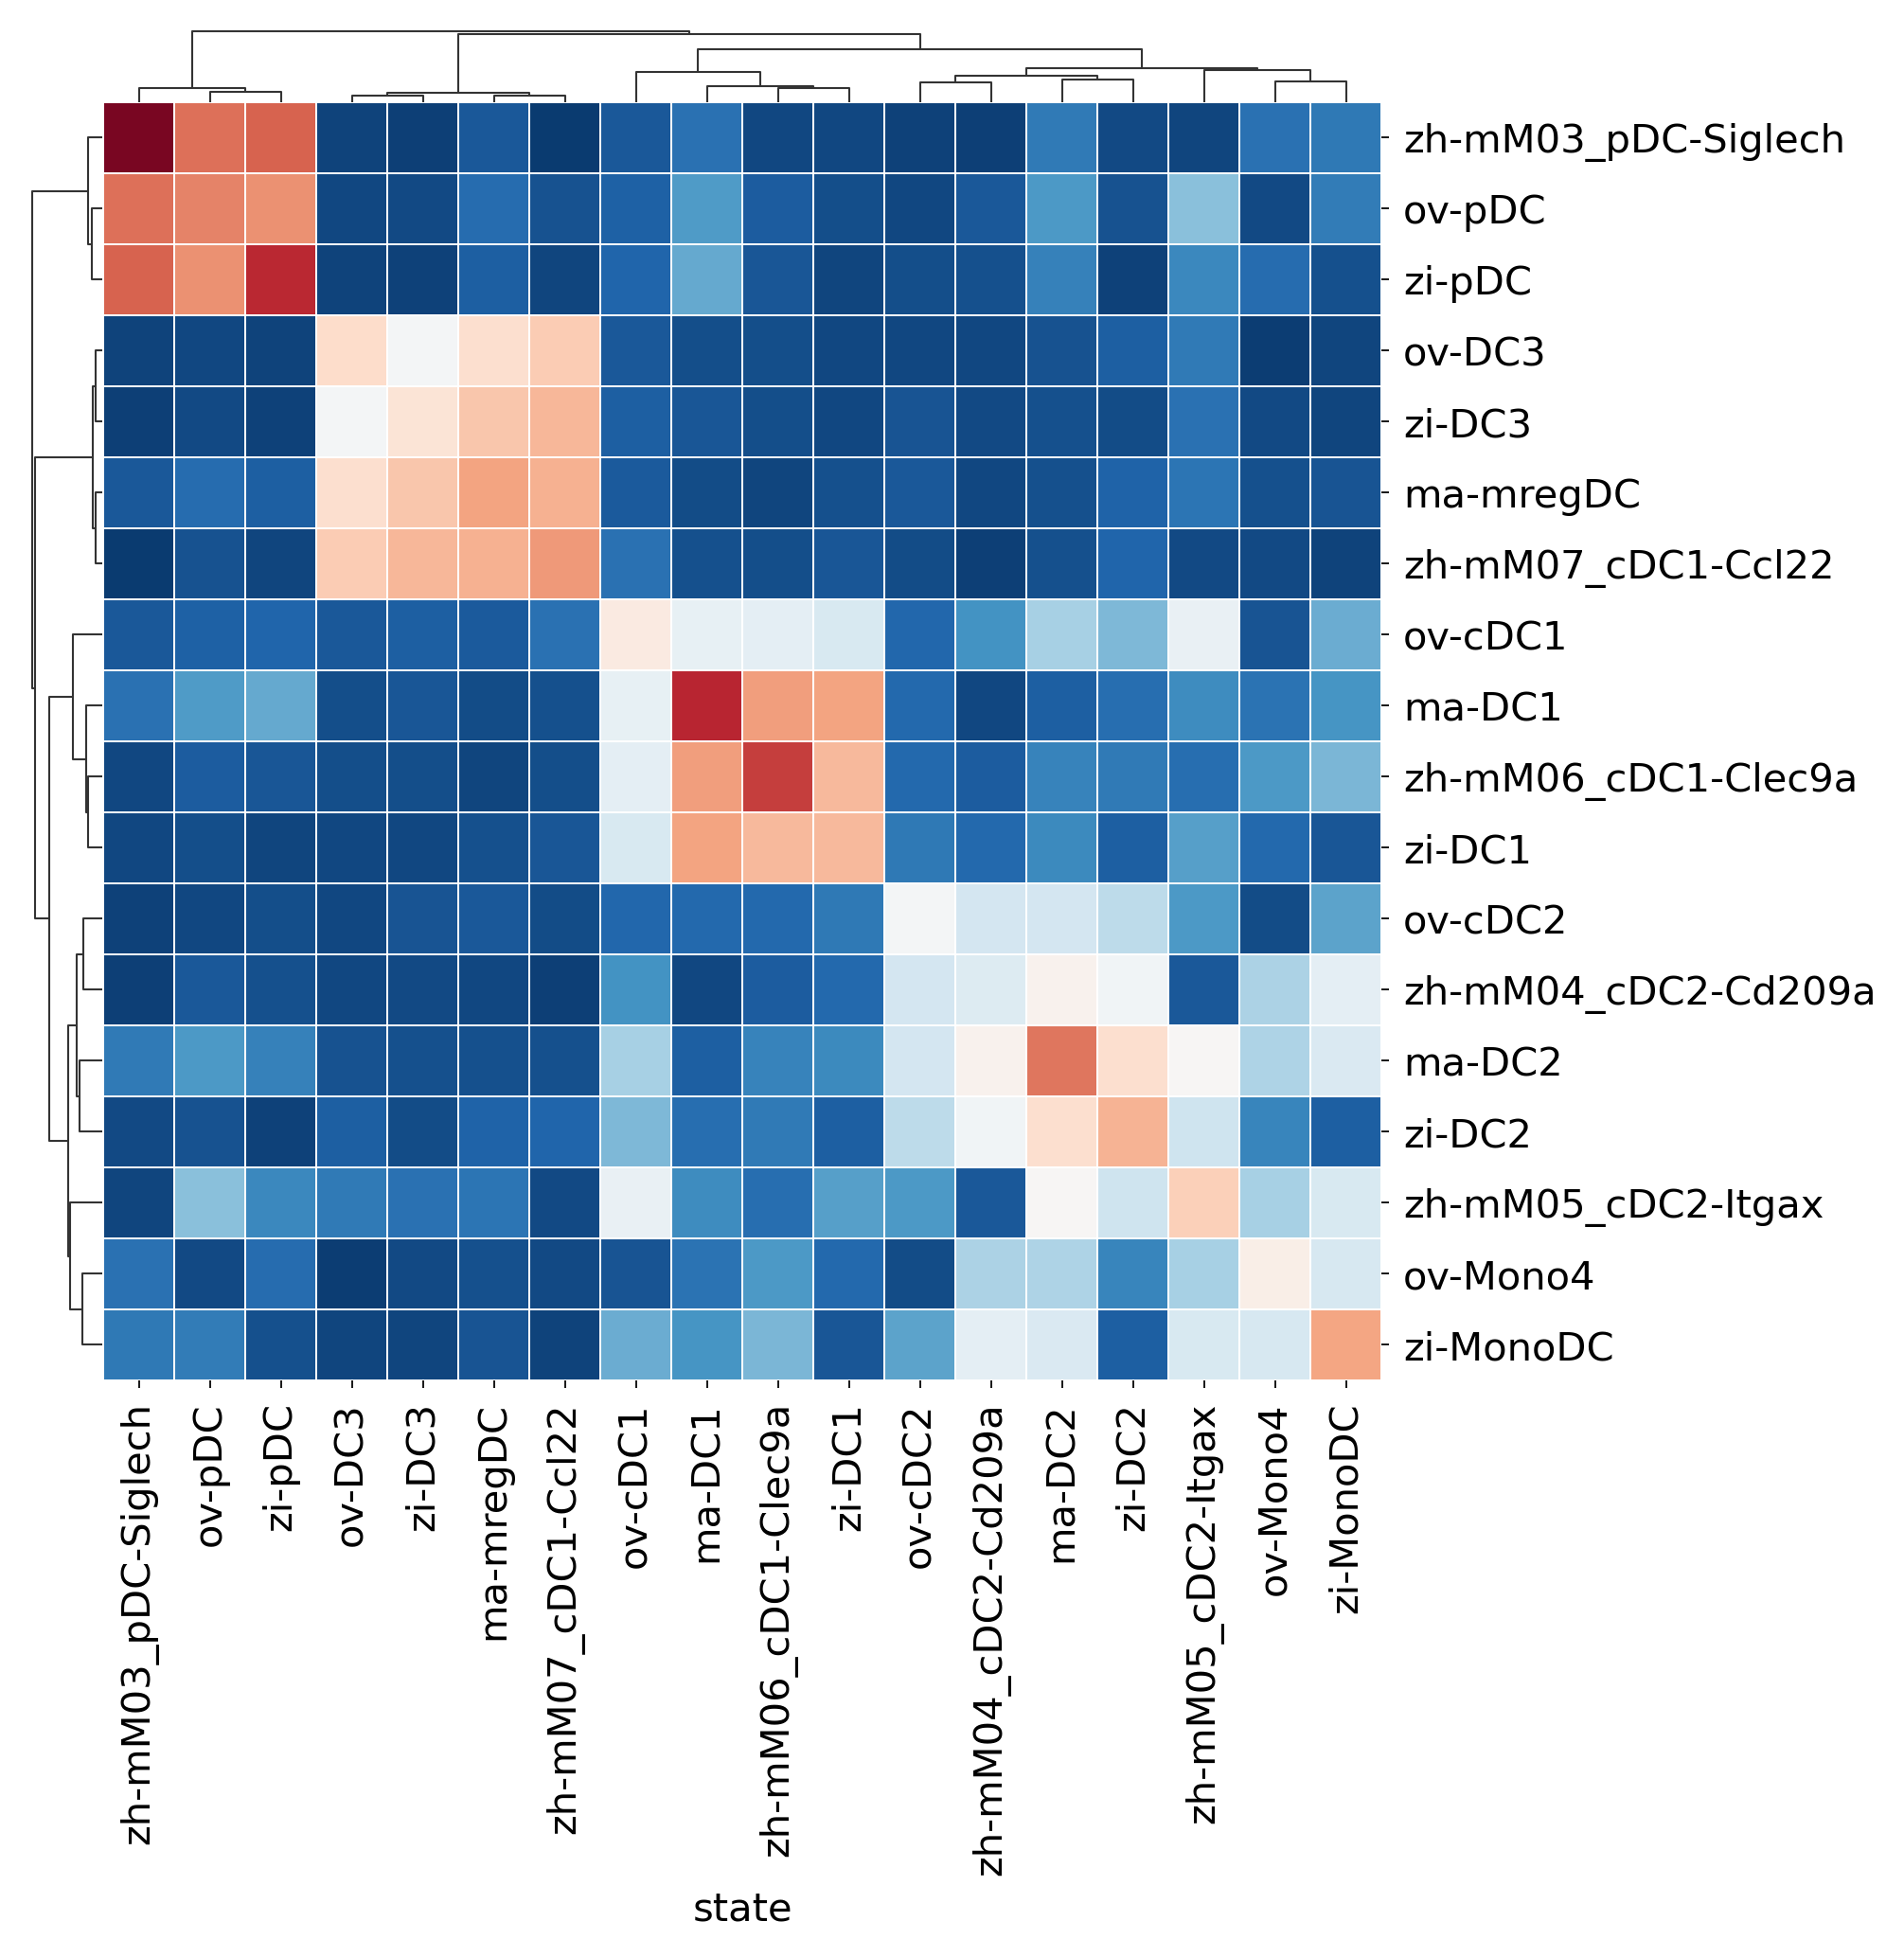

In [26]:
ax = mm.fixedWidthClusterMap(heatmap_log_linearSVM, method = 'average', metric = 'euclidean', dendrogram_ratio=(.05, .05), row_cluster = True, col_cluster = True, 
                             cmap = plt.cm.get_cmap('RdBu_r'), linewidths = .25, cbar_pos = None, cellSizePixels=75, vmin = 0, vmax = 0.8)

print(all(ax.data2d.columns == ax.data2d.index))
plt.savefig('./outputs/dc-loglinearsvc-heatmap-average-euclidean_v2.pdf', dpi = 400)

## Load adata's T cells 

In [25]:
# Create a path dict 
keys = [path.split('_')[1] for path in glob.glob('./backups/adata_*.h5ad')]
values = glob.glob('backups/adata_*.h5ad')
adataPathDict = dict(zip(keys, values))

In [27]:
adataPathDict

{'miller': 'backups/adata_miller_05202020.h5ad',
 'zhangcd40': 'backups/adata_zhangcd40_05202020.h5ad',
 'millerlcmv': 'backups/adata_millerlcmv_05202020.h5ad',
 'allntova': 'backups/adata_allntova_05302020.h5ad'}

In [28]:
# Reload adatas into dict  
adata = {key:sc.read_h5ad(value) for key, value in adataPathDict.items()}

In [29]:
# Check shapes 
for dataset in adata.keys():
    print(dataset)
    print(adata[dataset].shape)

miller
(4313, 13880)
zhangcd40
(119698, 15243)
millerlcmv
(9194, 27998)
allntova
(8757, 20679)


## Add name prefix to states in each adata

In [30]:
adata['allntova'].obs['State'] = ['ov-'+ str(cluster) for cluster in adata['allntova'].obs['State']]

adata['miller'].obs['state'] = ['mi-'+ str(cluster) for cluster in adata['miller'].obs['state']]

adata['millerlcmv'].obs['state'] = ['miL-'+ str(cluster) for cluster in adata['millerlcmv'].obs['state']]

adata['zhangcd40'].obs['State'] = ['zh-'+ str(cluster) for cluster in adata['zhangcd40'].obs['State']]

In [32]:
# Subset allntova 

# Tumor DCs: 
ov_slist_1 = ['ov-CD8 T E', 'ov-CD4 T R/H', 'ov-NK', 'ov-CD8 T M']

# Actually do the filtering 
adata['allntova'] = mm.filter_cells_adata(adata['allntova'], return_filtered = True, 
                                          col1 = 'State', flist1 = ov_slist_1) 

1585 cells will survive State filtering.

Shape before filtering: (8757, 20679)


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Shape after filtering: (1585, 20679) 

State unique values after filtering: ['ov-CD8 T E', 'ov-CD4 T R/H', 'ov-NK', 'ov-CD8 T M'] 



In [33]:
# miller lcmv 

miL_slist_1 = ['miL-Cluster 3']

# Actually do the filtering 
adata['millerlcmv'] = mm.filter_cells_adata(adata['millerlcmv'], return_filtered = True, 
                                            col1 = 'state', flist1 = miL_slist_1, isnot1 = True) 

9072 cells will survive state filtering.

Shape before filtering: (9194, 27998)


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Shape after filtering: (9072, 27998) 

state unique values after filtering: ['miL-CD8 T E', 'miL-CD8 T Ef', 'miL-CD8 T P', 'miL-CD8 T Pr'] 



In [35]:
# Subset zhangcd40 
            
zh_tlist_1 = ['Tumor']
zh_trlist_1 = ['Isotype']

# Select T cell states (don't select low count T cell states from LN)
zh_slist_1 = ['zh-mT01_CD4_Tn-Lef1', 'zh-mT07_CD8_Tn-Ccr7', 'zh-mT04_CD4_Treg-Foxp3', 'zh-mT03_CD4_Th-Bhlhe40', 
              'zh-mT09_CD8_Tem-Ccl5', 'zh-mT11_CD8_Tex-Lag3', 'zh-mT10_CD8_Trm-Cxcr6', 'zh-mT12_CD8_Tex-Mki67', 
              'zh-mI01_NK-Klrb1c', 'zh-mL01_NKT-Cd163l1']


adata['zhangcd40'] = mm.filter_cells_adata(adata['zhangcd40'], return_filtered = True, 
                                           col1 = 'Tissue', flist1 = zh_tlist_1, 
                                           col2 = 'Treatment', flist2 = zh_trlist_1, 
                                           col3 = 'State', flist3 = zh_slist_1) 

51252 cells will survive Tissue filtering.
66931 cells will survive Treatment filtering.
72680 cells will survive State filtering.
11001 cells will survive all filters.

Shape before filtering: (119698, 15243)


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Shape after filtering: (11001, 15243) 

Tissue unique values after filtering: ['Tumor'] 

Treatment unique values after filtering: ['Isotype'] 

State unique values after filtering: ['zh-mI01_NK-Klrb1c', 'zh-mT04_CD4_Treg-Foxp3', 'zh-mT03_CD4_Th-Bhlhe40', 'zh-mL01_NKT-Cd163l1', 'zh-mT01_CD4_Tn-Lef1', 'zh-mT07_CD8_Tn-Ccr7', 'zh-mT11_CD8_Tex-Lag3', 'zh-mT12_CD8_Tex-Mki67', 'zh-mT10_CD8_Trm-Cxcr6', 'zh-mT09_CD8_Tem-Ccl5'] 



## For all datasets, create an outlier gene filter gmask 

In [37]:
# Filter out outlier genes 
gmask = {}
for dataset in adata.keys(): 
    print(dataset)
    min_counts = 1 * adata[dataset].X.sum(1).mean()/1e4
    gmask[dataset] = mm.gmask_outlier_genes(adata[dataset], min_counts = min_counts, min_cells = 5)

miller
11840 genes are expressed in at least 5 cells with at least more than 1.08636943359375 counts per cell

zhangcd40
13212 genes are expressed in at least 5 cells with at least more than 0.586404052734375 counts per cell

millerlcmv
12719 genes are expressed in at least 5 cells with at least more than 0.322316796875 counts per cell

allntova
12218 genes are expressed in at least 5 cells with at least more than 0.09758220825195313 counts per cell



In [38]:
# Find common genes of all datasets 
var_names = functools.reduce(np.intersect1d, [adata[dataset][:, gmask[dataset]].var_names for dataset in adata.keys()])
len(var_names)

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


8907

In [43]:
# Subset adata's to have intersecting var_names
for dataset in adata.keys():
    print(dataset)
    adata[dataset] = adata[dataset][:, var_names].copy()
    print(len(adata[dataset].var_names), adata[dataset].shape)

miller


/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


8907 (4313, 8907)
zhangcd40
8907 (11001, 8907)
millerlcmv
8907 (9072, 8907)
allntova
8907 (1585, 8907)


## Log linear SVC T cells

In [39]:
# Rename 'State' columns to 'state'
adata['zhangcd40'].obs.rename({'State': 'state'}, axis=1, inplace = True)
adata['allntova'].obs.rename({'State': 'state'}, axis=1, inplace = True)

In [45]:
# Run linear SVM for all dataset-dataset comparisons (also self-self) on log transformed adata
log_mean_predp_linearSVM = mm.adata_classifier(mm.fit_linearSVM, adata, log = True, c_param = 1, max_iter = 20000)

Started running miller_to_miller
Started running miller_to_zhangcd40
Started running miller_to_millerlcmv
Started running miller_to_allntova
Started running zhangcd40_to_miller
Started running zhangcd40_to_zhangcd40
Started running zhangcd40_to_millerlcmv
Started running zhangcd40_to_allntova
Started running millerlcmv_to_miller
Started running millerlcmv_to_zhangcd40
Started running millerlcmv_to_millerlcmv
Started running millerlcmv_to_allntova
Started running allntova_to_miller
Started running allntova_to_zhangcd40
Started running allntova_to_millerlcmv
Started running allntova_to_allntova


In [46]:
# Calculate reciprocals for all dataset-dataset comparisons (also self-self)
reciprocals_log_linearSVM = mm.calculate_reciprocals(log_mean_predp_linearSVM) 

Multiplying miller_to_miller with miller_to_miller
Assigned miller_miller
Assigned miller_miller
Multiplying miller_to_zhangcd40 with zhangcd40_to_miller
Assigned miller_zhangcd40
Assigned zhangcd40_miller
Multiplying miller_to_millerlcmv with millerlcmv_to_miller
Assigned miller_millerlcmv
Assigned millerlcmv_miller
Multiplying miller_to_allntova with allntova_to_miller
Assigned miller_allntova
Assigned allntova_miller
Multiplying zhangcd40_to_miller with miller_to_zhangcd40
Assigned zhangcd40_miller
Assigned miller_zhangcd40
Multiplying zhangcd40_to_zhangcd40 with zhangcd40_to_zhangcd40
Assigned zhangcd40_zhangcd40
Assigned zhangcd40_zhangcd40
Multiplying zhangcd40_to_millerlcmv with millerlcmv_to_zhangcd40
Assigned zhangcd40_millerlcmv
Assigned millerlcmv_zhangcd40
Multiplying zhangcd40_to_allntova with allntova_to_zhangcd40
Assigned zhangcd40_allntova
Assigned allntova_zhangcd40
Multiplying millerlcmv_to_miller with miller_to_millerlcmv
Assigned millerlcmv_miller
Assigned miller_mi

In [47]:
heatmap_log_linearSVM = pd.concat([reciprocals_log_linearSVM[df].stack() for df in reciprocals_log_linearSVM.keys()], axis=0).unstack()

In [52]:
# Remove unannotated cluster
heatmap_log_linearSVM.drop('mi-grey', axis = 0, inplace = True)
heatmap_log_linearSVM.drop('mi-grey', axis = 1, inplace = True)

In [53]:
heatmap_log_linearSVM.min().min()

0.02531842061890223

In [54]:
heatmap_log_linearSVM.max().max()

0.6521965772790984

## Fig. S1B

True


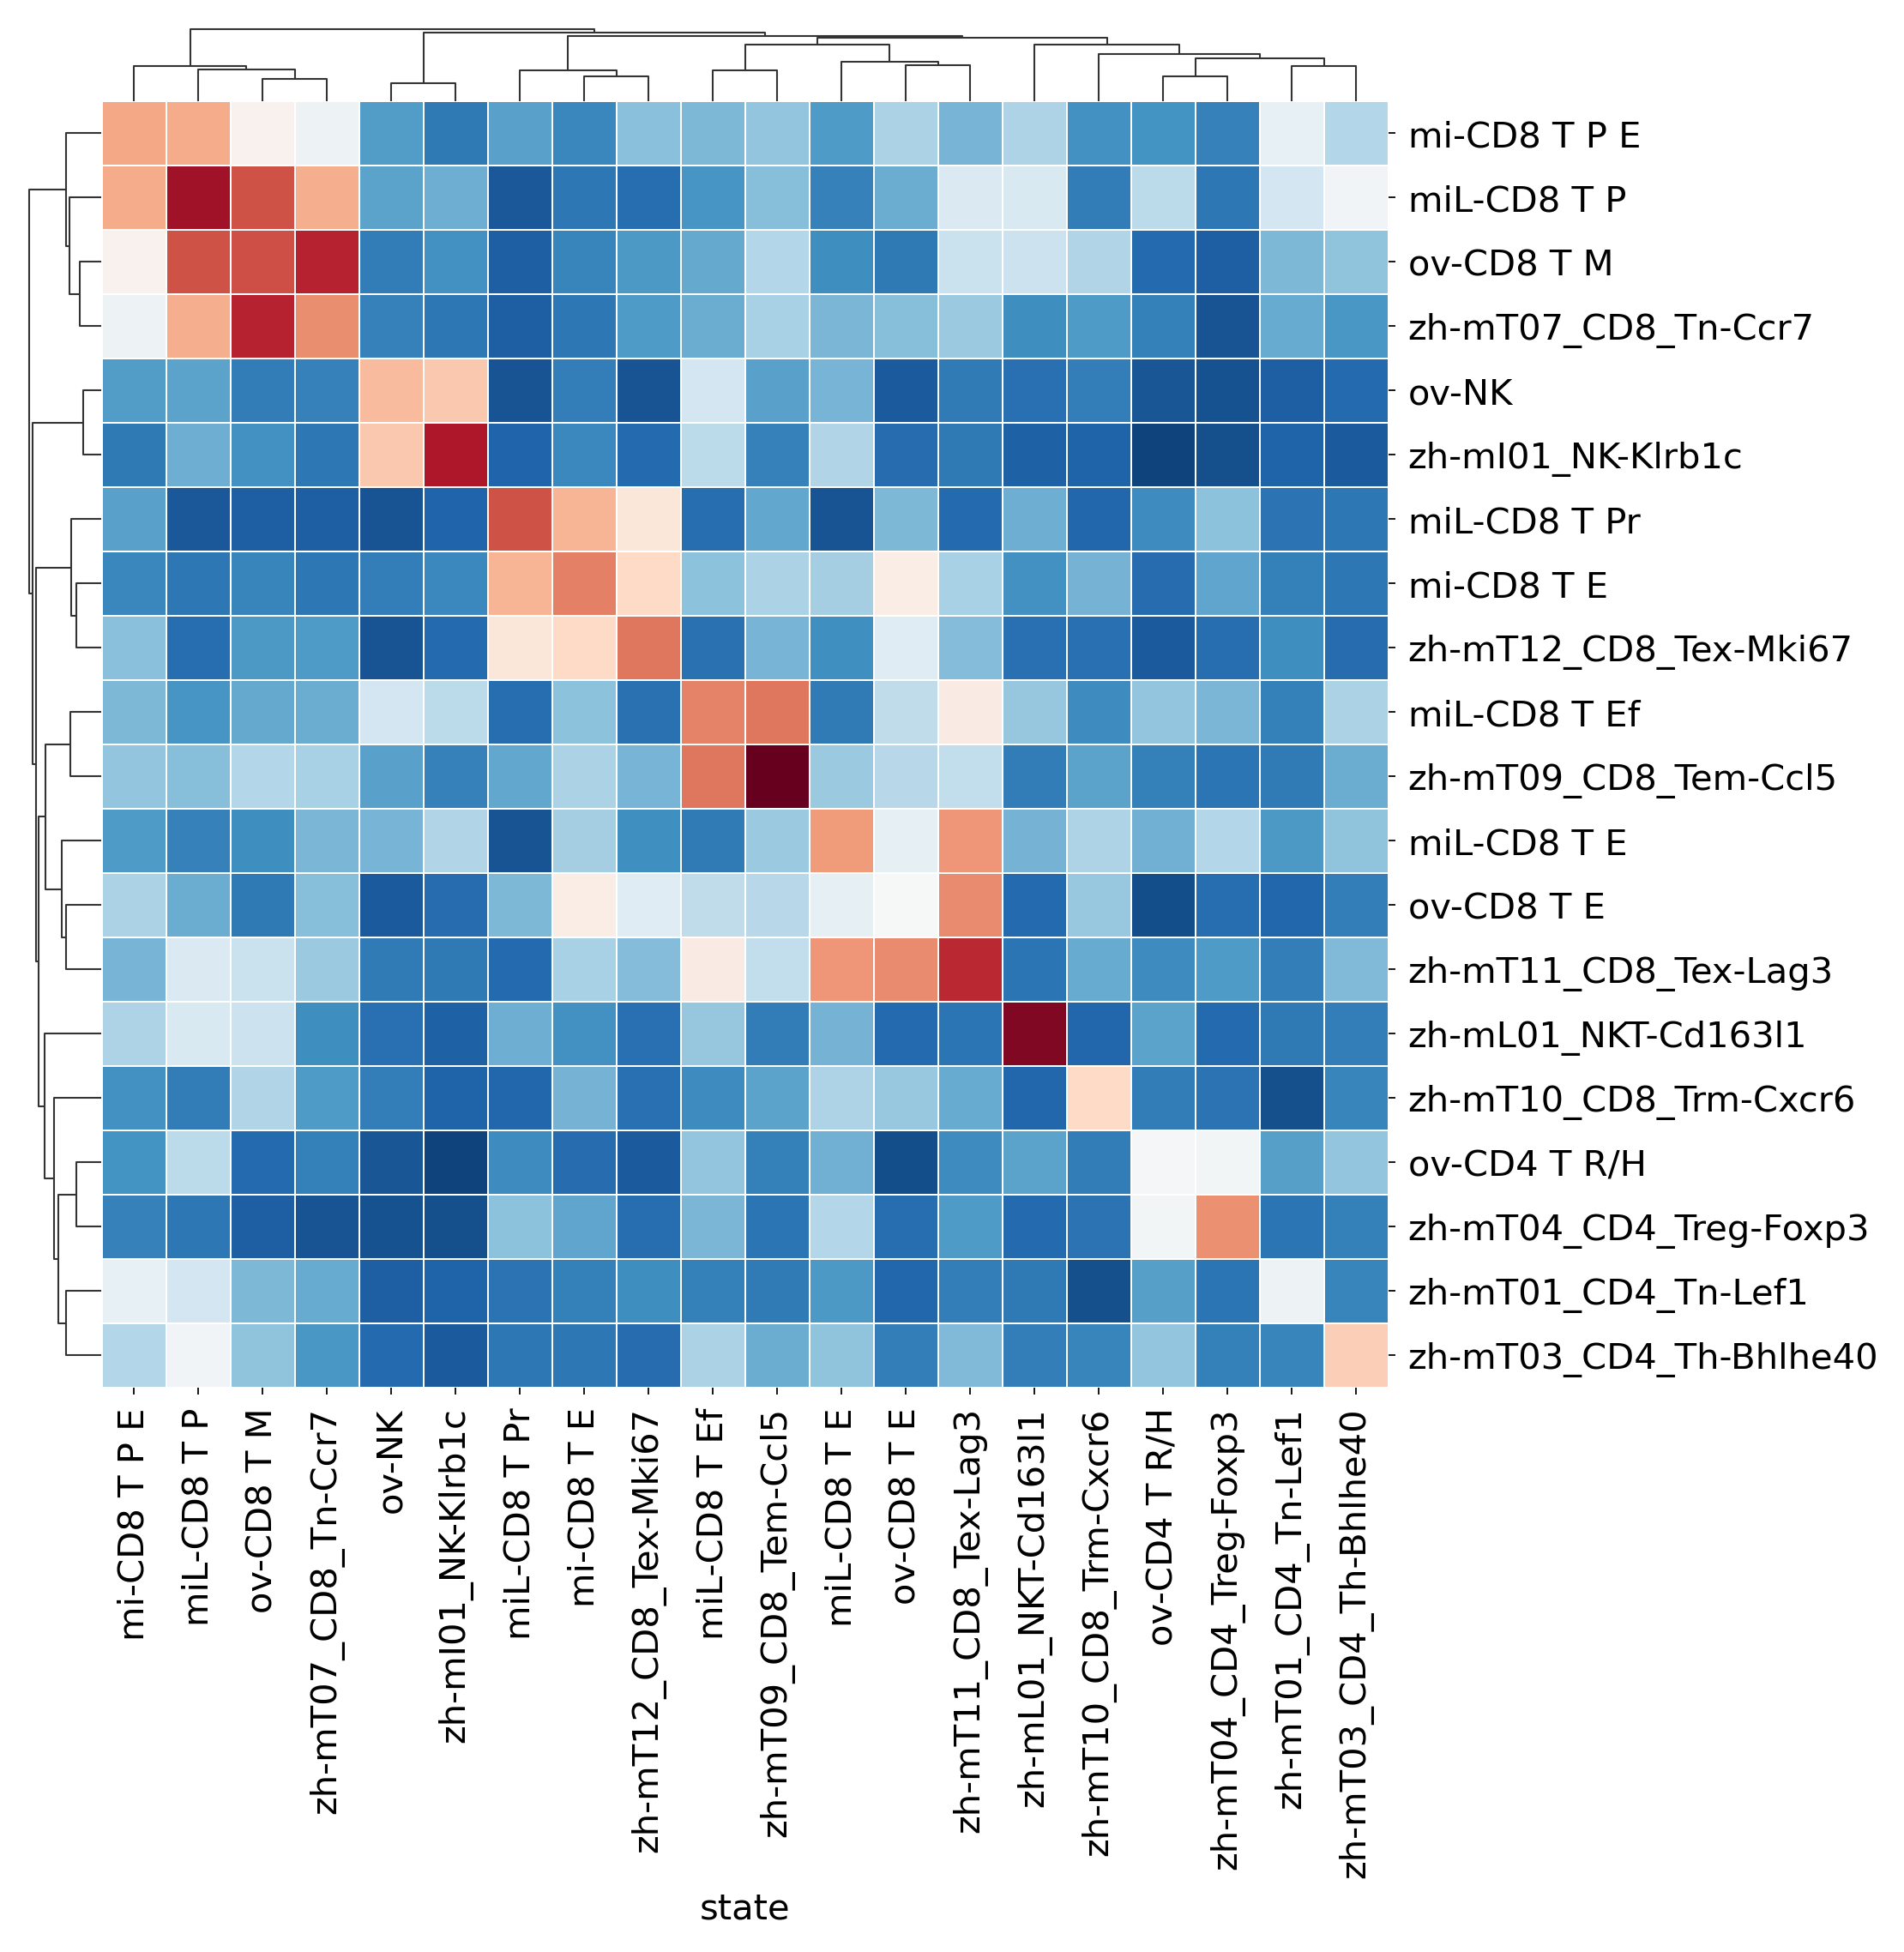

In [55]:
ax = mm.fixedWidthClusterMap(heatmap_log_linearSVM, method = 'average', metric = 'euclidean', dendrogram_ratio=(.05, .05), row_cluster = True, col_cluster = True, 
                             cmap = plt.cm.get_cmap('RdBu_r'), linewidths = .25, cbar_pos = None, cellSizePixels=75, vmin = 0, vmax = 0.65)

print(all(ax.data2d.columns == ax.data2d.index))

## Identify enriched gene sets for each state 

In [9]:
# Reload adata allntova 
adata['allntova'] = sc.read_h5ad('backups/adata_allntova_05302020.h5ad')

In [10]:
gmask = mm.gmask_outlier_genes(adata['allntova'], min_counts = 1*adata['allntova'].X.sum(1).mean()/1e4, min_cells = 3)

18775 genes are expressed in at least 3 cells with at least more than 0.10588819580078125 counts per cell



In [11]:
deDfDict = mm.sc_de_testing(adata['allntova'][:, gmask], groupby = 'State', reference = 'rest', method = 'wilcoxon', corr_method = 'benjamini-hochberg', key_added = 'state', 
                            pval_adj = 0.05, upregulated = False, downregulated = False, logFC = 2, high_average = True, second = False, save_excel = False, fname = '')

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.


Started running sc.tl.rank_genes_groups...
Finished running sc.tl.rank_genes_groups...assign to deDfDict

State: Non-immune
-25.820538
Number of DE genes: 1636
Highest average number of DE genes: 643 

State: Mono1
-27.154799
Number of DE genes: 796
Highest average number of DE genes: 143 

State: CD8 T E
-29.565718
Number of DE genes: 765
Highest average number of DE genes: 119 

State: CD4 T R/H
-32.242405
Number of DE genes: 351
Highest average number of DE genes: 61 

State: Mac1
-26.631304
Number of DE genes: 544
Highest average number of DE genes: 59 

State: cDC2
-30.431503
Number of DE genes: 180
Highest average number of DE genes: 39 

State: Mac2
-9.254524
Number of DE genes: 98
Highest average number of DE genes: 48 

State: cDC1
-8.872145
Number of DE genes: 109
Highest average number of DE genes: 10 

State: DC3
-8.385241
Number of DE genes: 116
Highest average number of DE genes: 67 

State: NK
-28.441721
Number of DE genes: 531
Highest average number of DE genes: 52 

St

In [12]:
col_order = ['CD8 T E', 'CD8 T M', 'CD4 T R/H', 'NK', 'B cells', 'Mast cells', 'cDC1', 'cDC2', 'DC3', 
             'pDC', 'Mono1', 'Mono2', 'Mono4', 'Neu', 'Mac1','Mac2', 'Non-immune']

In [13]:
heat_genes = functools.reduce(np.append, [np.array(deDfDict[state]['names']) for state in col_order])

In [14]:
marker_heat = mm.adata_centroids('State', adata['allntova'][:, heat_genes]) 

/Users/mariusmessemaker/miniconda3/envs/py36-sc/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [15]:
heat = marker_heat + adata['allntova'].X.sum(1).mean()/1e4 
heat = heat/heat.median(0) 
heat = np.log2(heat)
print(heat.min().min()) 
print(heat.max().max())

-4.459451411896657
7.780118962378007


In [16]:
heat = heat.loc[col_order, :] 

## Fig. S1E 

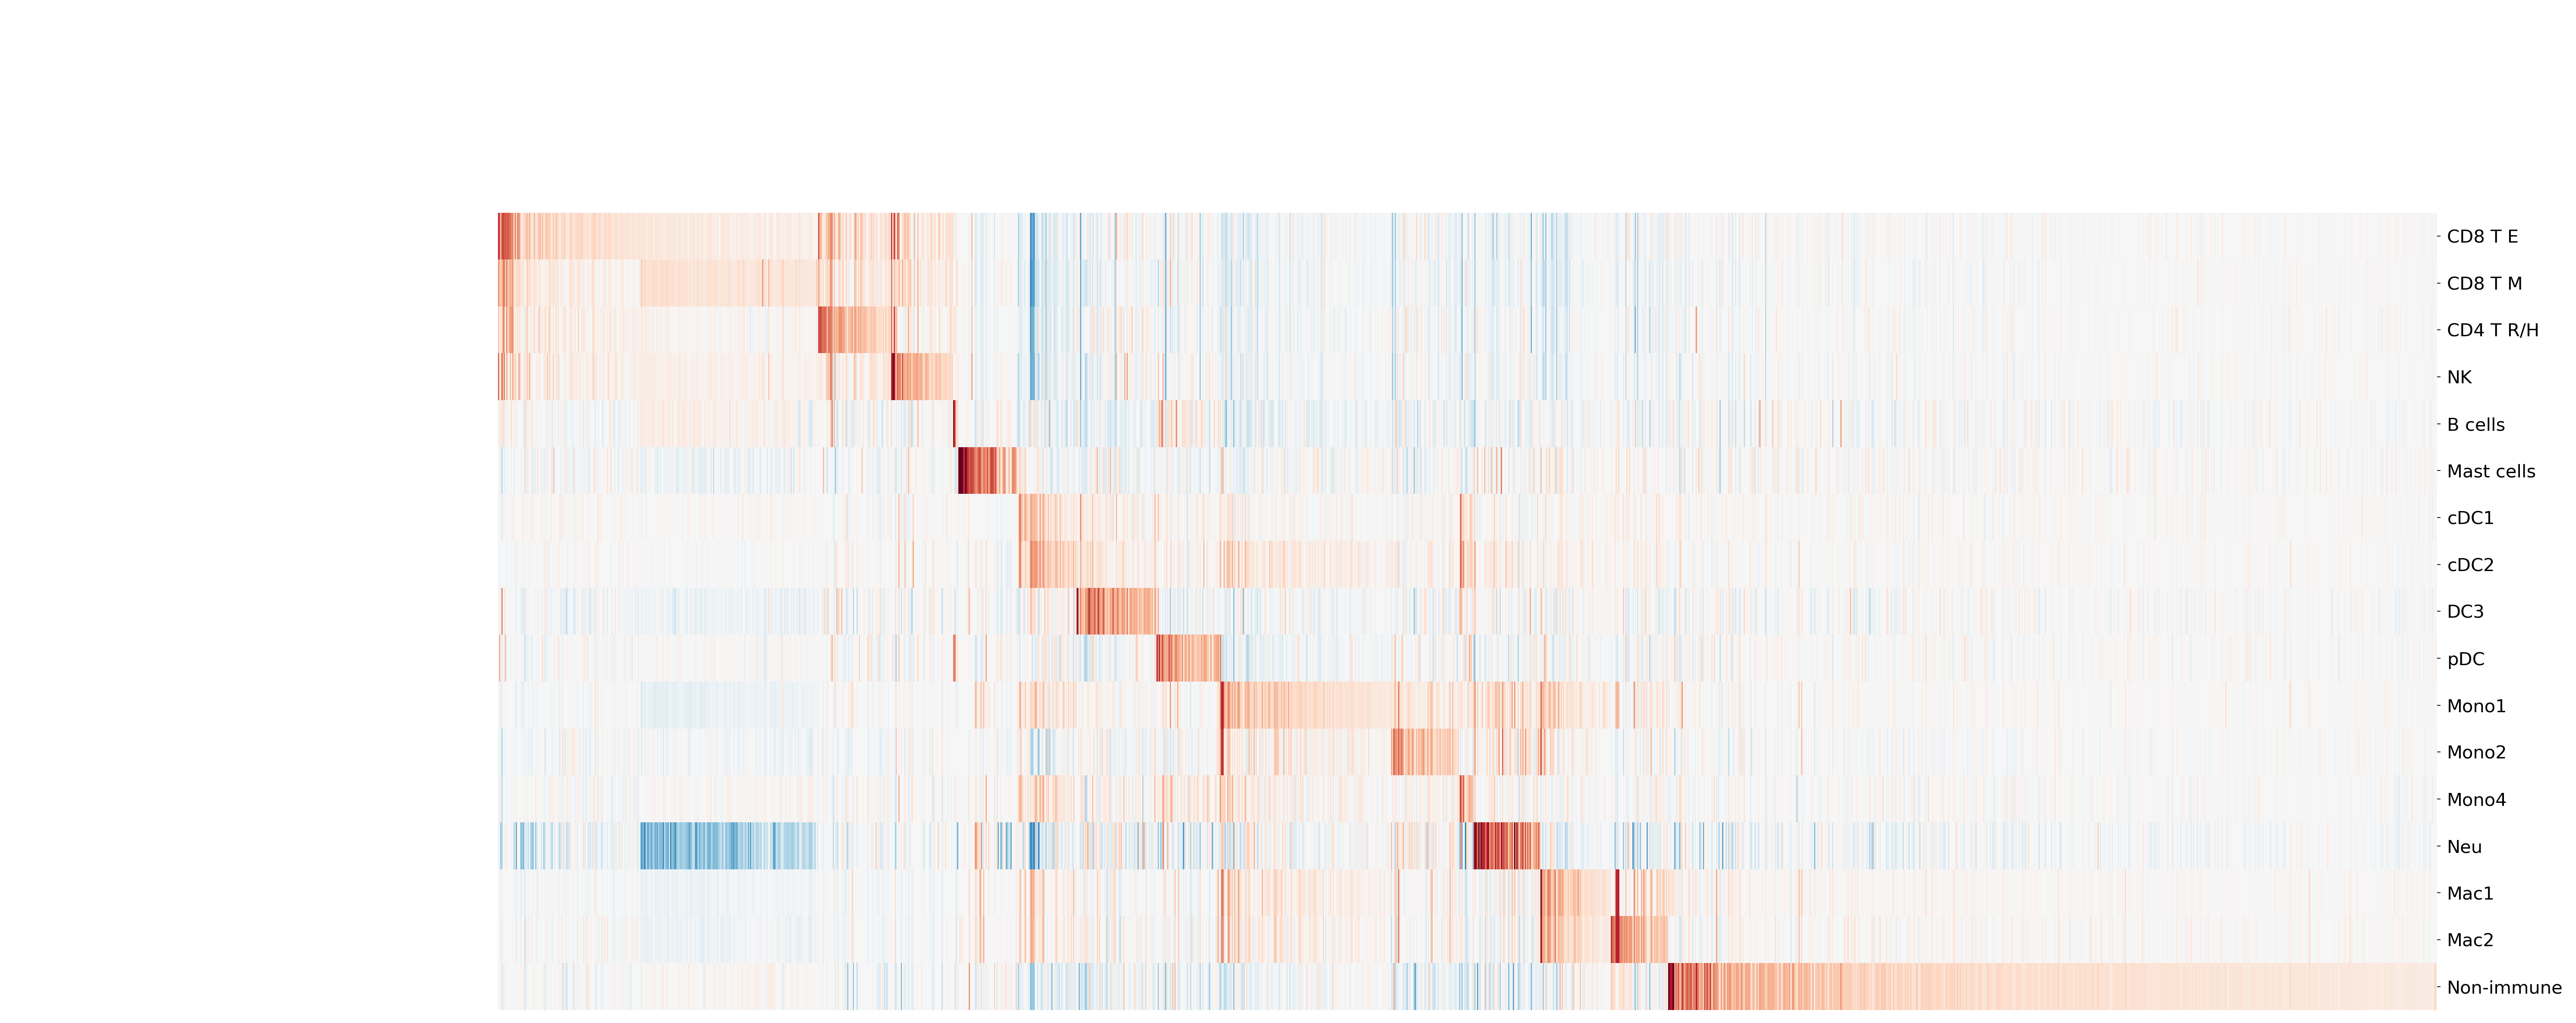

In [17]:
ax = sns.clustermap(heat, figsize=(20, 8), linewidths = 0, xticklabels = 0, yticklabels = 1, cmap = plt.cm.get_cmap('RdBu_r'), 
                    vmin = -6, vmax = 6, # here you indicate a symmetric vmin and vmax 
                    row_cluster = False, col_cluster = False, cbar_pos = None) # you don't want to cluster in this case as you determine the orders

# With this function you can export an excel table in which the cells are colored by the expression level
mm.color_dataframe_cells(heat, vmin = -6, vmax = 6).to_excel('./outputs/gene_expression_heatmaps/heatmap_markers.xlsx')
ax.savefig('./outputs/gene_expression_heatmaps/heatmap_markers.pdf', dpi = 400)

## Export SPRING plot 

In [ ]:
sc.external.exporting.spring_project(adata['allntova'], '/Users/mariusmessemaker/Documents/Project/SPRING_dev-master/datasets/mempel', 'X_umap', subplot_name='mempel', cell_groupings=['State', 'ImmGen', 'Biological replicate'], 
                                     custom_color_tracks=None, total_counts_key='nCount_RNA', neighbors_key='neighbors', overwrite=False)

In [ ]:
# Fix the mirroring of the SPRING plot 
out = []
with open('/Users/mariusmessemaker/Documents/Project/SPRING_dev-master/datasets/mempel/mempel/coordinates.txt','r') as infile:
      
        for line in infile:
            line = line.split(',')
            out.append(','.join([line[0], line[1], str(-float(line[2]))]))
        
with open('/Users/mariusmessemaker/Documents/Project/SPRING_dev-master/datasets/mempel/mempel/coordinates.txt', 'w') as outfile: 
    outfile.write('\n'.join(out))